## NOT FOR EVALUATION: ROUGH WORK

In [66]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import glob
%matplotlib qt

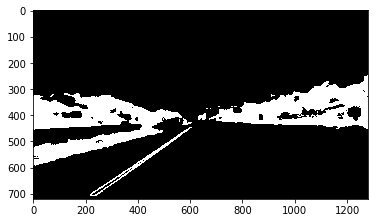

In [67]:
image = mpimg.imread('test_images/straight_lines1.jpg')
img = cv2.undistort(image, mtx, dist, None, mtx)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
b_channel = hls[:,:,2]

b_binary = np.zeros_like(b_channel)
b_binary[(b_channel >= 145) & (b_channel <= 200)] = 1
plt.imshow(b_binary,cmap='gray')

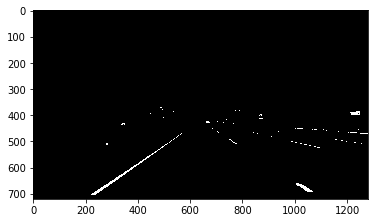

In [68]:
image = mpimg.imread('test_images/straight_lines1.jpg')
img = cv2.undistort(image, mtx, dist, None, mtx)
luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
l_channel = hls[:,:,0]

l_binary = np.zeros_like(b_channel)
l_binary[(l_channel >= 200) & (l_channel <= 255)] = 1
plt.imshow(l_binary,cmap='gray')

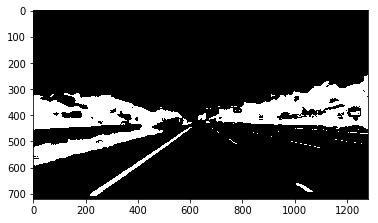

In [69]:
combined_bin = np.zeros_like(sxbinary)
combined_bin[(b_binary == 1) | (l_binary == 1)] = 1
plt.imshow(combined_bin,cmap='gray')

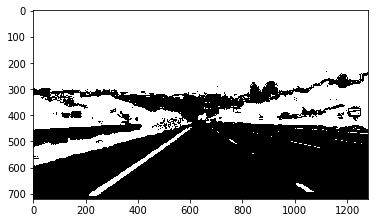

In [70]:
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
#h_channel = hls[:,:,0]
# Sobel x
sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
# Threshold x gradient
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= 20) & (scaled_sobel <= 100)] = 1
    
# Threshold color channel
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= 90) & (s_channel <= 255)] = 1
# Stack each channel
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
                            
# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) | (sxbinary == 1)|(combined_bin==1)] = 1
plt.imshow(combined_binary,cmap='gray')

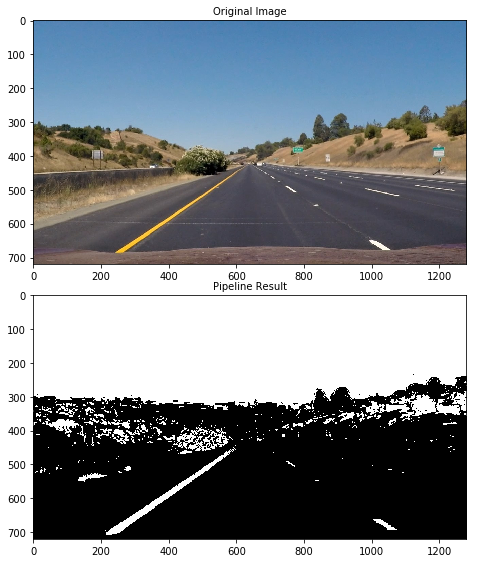

In [10]:
with open("wide_dist_pickle.p", mode='rb') as f:
    camera_calib = pickle.load(f)
mtx = camera_calib["mtx"]
dist = camera_calib["dist"]
image = mpimg.imread('test_images/straight_lines1.jpg')

def threshold_pipeline(img, s_thresh=(90, 255), sx_thresh=(20, 100)):
    img = cv2.undistort(img, mtx, dist, None, mtx)
    img = np.copy(img)
   
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    #h_channel = hls[:,:,0]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= sx_thresh[0]) & (scaled_sobel <= sx_thresh[1])] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
                            
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    return color_binary,combined_binary
    
colorResult,combinedResult = threshold_pipeline(image)

#plt.imshow(combinedResult,cmap='gray')
# Plot the result
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=10)

ax2.imshow(combinedResult,cmap='gray')
ax2.set_title('Pipeline Result', fontsize=10)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

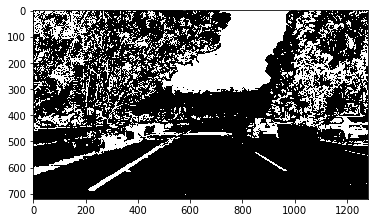

In [64]:
image = mpimg.imread('test_images/straight_lines1.jpg')


undst = cv2.undistort(image, mtx, dist, None, mtx)
lab = cv2.cvtColor(undst, cv2.COLOR_RGB2LAB)
b_channel = lab[:,:,2]

b_binary = np.zeros_like(b_channel)
b_binary[(b_channel >= 145) & (b_channel <= 200)] = 1
luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
l_channel = luv[:,:,0]
#l_channel = hls[:,:,0]

l_binary = np.zeros_like(l_channel)
l_binary[(l_channel >= 225) & (l_channel <= 255)] = 1
    
combined_bin = np.zeros_like(l_binary)
combined_bin[(s_binary == 1) | (l_binary == 1)] = 1
    
hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#l_channel = hls[:,:,1]
s_channel = hls[:,:,2]
#h_channel = hls[:,:,0]
# Sobel x
sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
# Threshold x gradient
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= 20) & (scaled_sobel <= 100)] = 1
    
# Threshold color channel
s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= 90) & (s_channel <= 255)] = 1
# Stack each channel
color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
                            
# Combine the two binary thresholds
combined_binary = np.zeros_like(sxbinary)
combined_binary[(s_binary == 1) & (sxbinary == 1) |(combined_bin==1)] = 1
plt.imshow(combined_binary,cmap='gray')

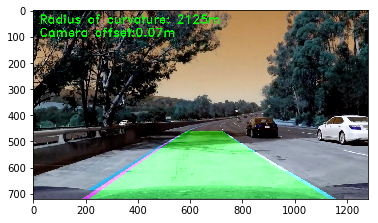

In [61]:
%matplotlib inline
####Define Functions
def threshold_pipeline(undst):
    
    undst = cv2.undistort(image, mtx, dist, None, mtx)
    lab = cv2.cvtColor(undst, cv2.COLOR_RGB2LAB)
    b_channel = lab[:,:,2]

    b_binary = np.zeros_like(b_channel)
    b_binary[(b_channel >= 145) & (b_channel <= 200)] = 1
    luv = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #l_channel = luv[:,:,0]
    l_channel = hls[:,:,0]

    l_binary = np.zeros_like(l_channel)
    l_binary[(l_channel >= 225) & (l_channel <= 255)] = 1
    
    combined_bin = np.zeros_like(l_binary)
    combined_bin[(b_binary == 1) | (l_binary == 1)] = 1
    
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    #l_channel = hls[:,:,1]
    s_channel = hls[:,:,2]
    #h_channel = hls[:,:,0]
    # Sobel x
    sobelx = cv2.Sobel(s_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= 20) & (scaled_sobel <= 100)] = 1
    
    # Threshold color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= 90) & (s_channel <= 255)] = 1
    # Stack each channel
    color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255
                            
    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) & (sxbinary == 1) |(combined_bin==1)] = 1

    
    return combined_binary
    
       
    

def region_of_interest(img, vertices):
        mask = np.zeros_like(img)   
    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image
        if len(img.shape) > 2:
            channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
            ignore_mask_color = (255,) * channel_count
        else:
            ignore_mask_color = 255
    #filling pixels inside the polygon defined by "vertices" with the fill color 
        cv2.fillPoly(mask, vertices, ignore_mask_color)
    #returning the image only where mask pixels are nonzero
        masked_image = cv2.bitwise_and(img, mask)
        return masked_image

def find_lane_pixels(binary_warped):
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the result
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
                        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]
    
    return leftx, lefty, rightx, righty, out_img
def fit_polynomial(binary_warped, leftx, lefty, rightx, righty, out_img):
    
    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty

    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    
    return out_img, left_fitx, right_fitx, ploty

def pipeline_advanced_lane(img):
    # Test undistortion on an image
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    img_size = (gray.shape[1], gray.shape[0])

    # Do camera calibration given object points and image points
    undst = cv2.undistort(img, mtx, dist, None, mtx)
    undst = cv2.cvtColor(undst, cv2.COLOR_BGR2RGB)
     
    combinedResult = threshold_pipeline(undst)
    
    #Region of Interest Pipeline
    masked_image = region_of_interest(combinedResult, vertices)
    
    
    # Perspective Transform
    # For source points I'm grabbing the outer four detected corners
    src = np.float32([[120, 720],[550, 460],[700, 460],[1160, 720]])
    dst = np.float32([[200,720],[200,0],[1000,0],[1000,720]])
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst, src)
    binary_warped = cv2.warpPerspective(combinedResult, M, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    #imshpe[1],imshape[0] to make it x y
    
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)   
    out_img, left_fitx, right_fitx, ploty  = fit_polynomial(binary_warped,leftx, lefty, rightx, righty, out_img)
    
    y_eval=np.max(ploty)
    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension
    
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
    left_cr_fit=np.polyfit(ploty*ym_per_pix, left_fitx*xm_per_pix,2)
    right_cr_fit=np.polyfit(ploty*ym_per_pix, right_fitx*xm_per_pix,2)
    left_curverad=((1+(2*left_cr_fit[0]*y_eval/2. + left_cr_fit[1])**2)**1.5)/np.absolute(2*left_cr_fit[0])
    right_curverad=((1+(2*right_cr_fit[0]*y_eval/2. + right_cr_fit[1])**2)**1.5)/np.absolute(2*right_cr_fit[0])
    curverad = (left_curverad + right_curverad) / 2
    
    left_coeff=(left_fit[0]*719**2)+left_fit[1]*719+left_fit[2]
    right_coeff=(right_fit[0]*719**2)+right_fit[1]*719+right_fit[2]
    mpoint=((right_coeff-left_coeff)/2)+left_coeff
    offset=(640-mpoint)*xm_per_pix
    
    warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    cv2.polylines(color_warp, np.int32([pts_left]), isClosed=False, color=(255,0,255), thickness=20)
    cv2.polylines(color_warp, np.int32([pts_right]), isClosed=False, color=(0,255,255), thickness=20)
    lane_lines = cv2.warpPerspective(color_warp, Minv, (imshape[1], imshape[0]), flags=cv2.INTER_LINEAR)
    
    result = cv2.addWeighted(img, 1, lane_lines, 0.5, 0)
    text1 = 'Radius of curvature: ' + '{:04.0f}'.format(curverad) + 'm'
    text2 = 'Camera offset:'+ '{:03.2f}'.format(offset) + 'm'
    cv2.putText(result, text1,(25,50), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0,255, 0), 2, cv2.LINE_AA)
    cv2.putText(result, text2,(25,100), cv2.FONT_HERSHEY_DUPLEX, 1.5, (0,255, 0), 2, cv2.LINE_AA)
  

    return result
  
fname = 'test_images/test5.jpg'
img = cv2.imread(fname)
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
imshape = img.shape #y,x coordinates
vertices = np.array([[(0,imshape[0]),(600,450), (750, 450), (imshape[1],imshape[0])]], dtype=np.int32)
result = pipeline_advanced_lane(img)
plt.imshow(result)

In [58]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [59]:
output = 'project_test.mp4'
clip1 = VideoFileClip("project_video.mp4").subclip(0,5)
#clip1 = VideoFileClip("project_video.mp4")
output_clip = clip1.fl_image(pipeline_advanced_lane) #NOTE: this function expects color images!!
%time output_clip.write_videofile(output, audio=False)

#white_output = 'test_videos_output/solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
#clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
#white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
#%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video project_test.mp4
[MoviePy] Writing video project_test.mp4


 99%|█████████▉| 125/126 [00:39<00:00,  2.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_test.mp4 

CPU times: user 27.1 s, sys: 3.23 s, total: 30.3 s
Wall time: 42.4 s


In [60]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(output))